In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Reading data

In [2]:
df=pd.read_csv('./data/train.csv',sep=',',parse_dates=True, index_col=0)
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


### Train/test split

In [3]:
X = df.drop(['casual', 'registered'],axis=1)

In [4]:
y=df['count']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
X_train.shape, y_train.shape

((8164, 9), (8164,))

In [7]:
X_test.shape, y_test.shape

((2722, 9), (2722,))

### Data analysis

In [8]:
X_train.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
dtype: object

#### Correlation matrix

Text(0.5, 1.0, 'Correlation matrix')

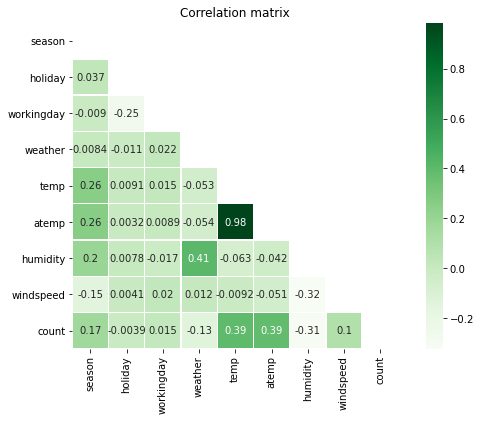

In [9]:
mask = np.triu(np.ones_like(X_train.corr(), dtype=np.bool))
fig, ax = plt.subplots(figsize = (10, 6)) 
sns.heatmap(X_train.corr(), mask=mask, annot=True, cmap='Greens', linewidths=0.3,square=True)
plt.title('Correlation matrix')


#### - the highest correlations with the count are temp and humidity
#### - the correlation between temp and atemp is very high, therefore one of these features shall be dropped 

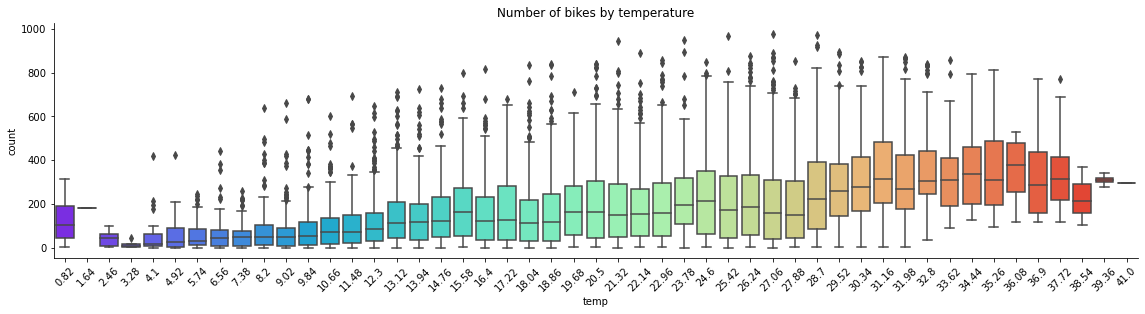

In [10]:
chart=sns.catplot(x="temp", y="count", data=X_train, palette="rainbow",kind="box",height=4, aspect=4)
plt.title('Number of bikes by temperature')

chart.set_xticklabels(rotation=45)

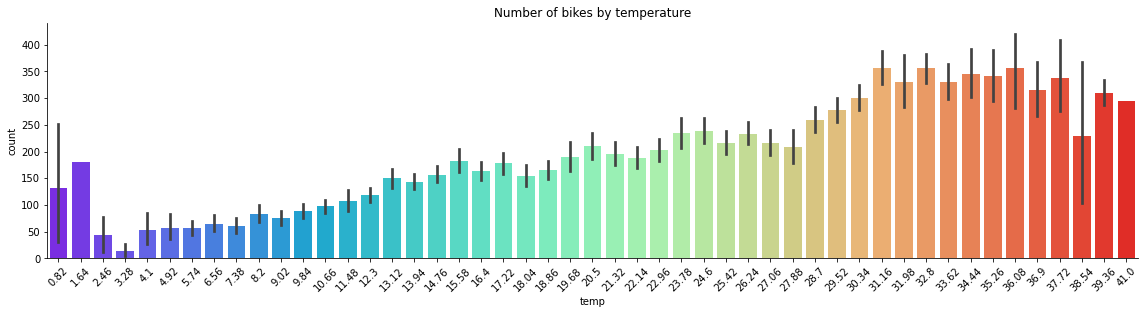

In [11]:
chart=sns.catplot(x="temp", y="count", data=X_train, palette="rainbow",kind="bar",height=4, aspect=4)
plt.title('Number of bikes by temperature')

chart.set_xticklabels(rotation=45)

Text(0.5, 1.0, 'Bikes by weather')

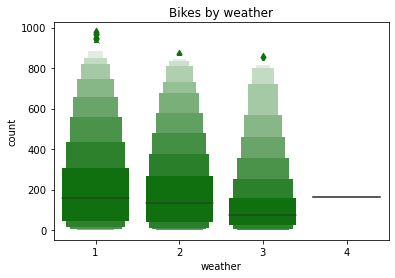

In [12]:
sns.boxenplot(x="weather", y="count",color="g",scale="linear", data=X_train)
plt.title('Bikes by weather')

Text(0.5, 1.0, 'Bikes by humidity')

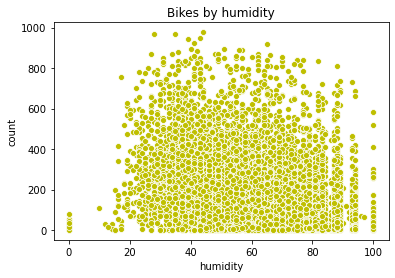

In [13]:
sns.scatterplot(x="humidity", y="count", color="y", data=X_train)
plt.title('Bikes by humidity')

Text(0.5, 1.0, 'Bikes by humidity')

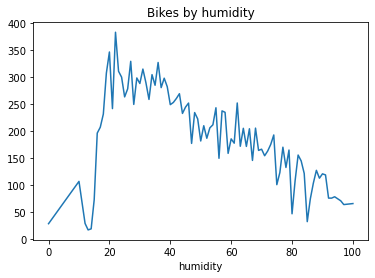

In [14]:
X_train.groupby('humidity')['count'].mean().plot()
plt.title('Bikes by humidity')

Text(0.5, 1.0, 'Bikes by temperature')

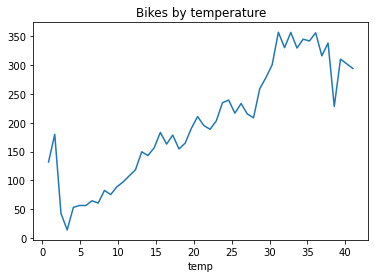

In [15]:
X_train.groupby('temp')['count'].mean().plot()
plt.title('Bikes by temperature')

Text(0.5, 1.0, 'Bikes by windspeed')

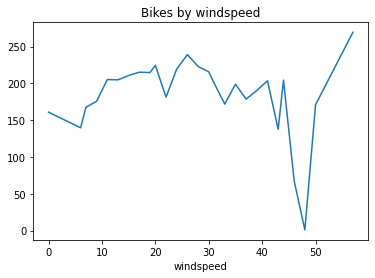

In [16]:
X_train.groupby('windspeed')['count'].mean().plot()
plt.title('Bikes by windspeed')

Text(0.5, 1.0, 'Bikes by season')

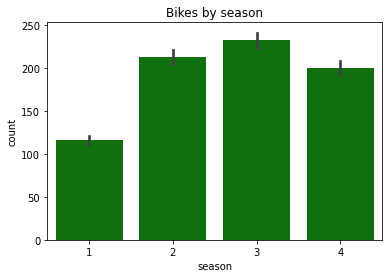

In [17]:
sns.barplot(x="season", y="count", color="g", data=X_train)
plt.title('Bikes by season')

### !!! Season 1 is the least popular

Text(0.5, 1.0, 'Bikes by windspeed')

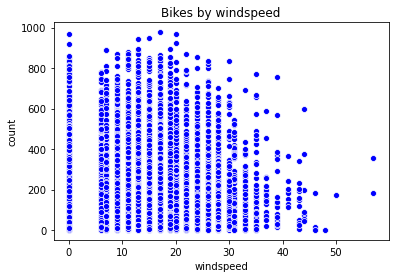

In [18]:
sns.scatterplot(x="windspeed", y="count", color="b", data=X_train)
plt.title('Bikes by windspeed')

<ipython-input-22-6734b3c7c824>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['hour'] = X_train.index.hour


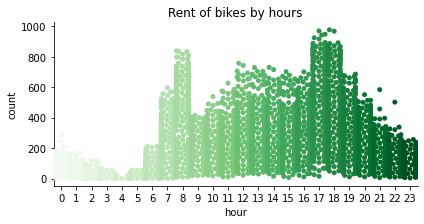

In [22]:
X_train['hour'] = X_train.index.hour
sns.catplot(x='hour', y="count", kind='swarm', data=X_train, palette="Greens", height=3, aspect=2)
plt.title('Rent of bikes by hours')
plt.savefig('./data/rent_by_hours.png')

#### Peak hours are at 7-9 am and 5-7 pm

<ipython-input-20-4b951eb023af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['month'] = X_train.index.month


Text(0.5, 1.0, 'Bikes by months')

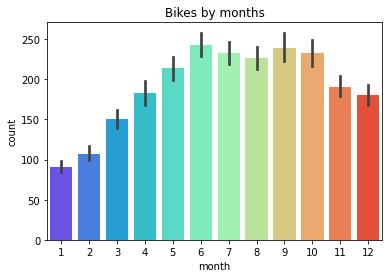

In [20]:
X_train['month'] = X_train.index.month
sns.barplot(data=X_train, x='month', y='count', palette="rainbow")
plt.title('Bikes by months')

<ipython-input-21-f10e02c0f099>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['weekday'] = X_train.index.weekday


Text(0.5, 1.0, 'Bikes by weekdays')

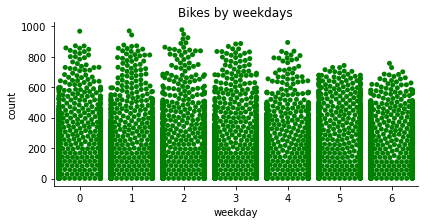

In [21]:
X_train['weekday'] = X_train.index.weekday
sns.catplot(x='weekday', y="count", kind='swarm', data=X_train, color='g', height=3, aspect=2)
plt.title('Bikes by weekdays')